
<p style="font-size:36px;text-align:center"> <b> Human activity Recognition </b> </p>

### Problem statement

Classify the activity of a person based on details given from smatphone.
As you know mobile devices have accelerometer as the sensor which collects the activities.</p>

### Real-world/Business objectives and constraints

* No low-latency requirement.
* No Interpretability is important.

 ### Importing Liabraies

In [1]:
# import the standard libraries
import pandas as pd #Data processing and I/O operation
import numpy as np #Linear Algebra
import matplotlib.pyplot as plt

%matplotlib inline

#Import the machine libraries
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Import the Dataset

In [2]:
train = shuffle(pd.read_csv('train.csv'))
test = shuffle(pd.read_csv('test.csv'))

In [3]:
train.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
3475,0.276965,-0.019331,-0.118193,-0.999079,-0.987775,-0.970602,-0.999285,-0.986493,-0.967689,-0.944061,...,-0.974750,0.055489,-0.009969,0.273790,0.205683,-0.896717,0.023091,0.013256,17,SITTING
1502,0.280809,-0.047893,-0.201153,-0.981599,-0.943973,-0.898933,-0.986253,-0.945456,-0.891092,-0.920525,...,-0.722700,0.055225,-0.239458,-0.210032,0.252277,-0.898392,0.088938,-0.056804,7,SITTING
5766,0.291336,-0.017490,-0.106286,-0.992633,-0.994397,-0.996661,-0.993038,-0.994680,-0.997878,-0.933875,...,-0.700103,0.012351,0.420097,0.281785,-0.642735,0.681400,-0.584320,-0.413511,26,LAYING
3465,0.279186,-0.025473,-0.124720,-0.994225,-0.956700,-0.953739,-0.995100,-0.952184,-0.953107,-0.939433,...,-0.201393,0.034923,-0.033539,0.205970,-0.121726,-0.892397,0.024169,-0.008011,17,SITTING
3740,0.279233,-0.005928,-0.081415,-0.026571,0.109606,-0.325281,-0.127917,0.167478,-0.336065,0.416963,...,-0.262583,0.093509,0.645403,-0.327133,-0.879972,-0.758717,0.261757,0.050782,19,WALKING
3939,0.114180,-0.042243,-0.118167,1.000000,0.753928,0.217305,1.000000,0.722617,0.179957,1.000000,...,-0.509677,0.586616,0.818511,-0.863211,-0.255721,-0.668652,0.228409,0.212093,19,WALKING_DOWNSTAIRS
2889,0.278782,-0.016036,-0.109653,-0.997884,-0.993761,-0.985590,-0.998081,-0.992791,-0.984780,-0.939488,...,-0.755637,-0.178397,0.032538,0.640324,0.068854,-0.765879,0.212355,0.136640,16,STANDING
2470,0.308785,-0.036460,-0.111855,-0.358689,0.011566,0.141159,-0.393288,-0.006655,0.017688,-0.122952,...,-0.900818,-0.507012,0.784514,0.768524,-0.181873,-0.446261,0.280626,0.359333,14,WALKING
7235,0.266525,-0.019132,-0.100675,-0.996054,-0.995600,-0.990106,-0.996684,-0.995985,-0.990593,-0.946694,...,-0.844807,-0.086632,0.301361,-0.207256,0.106778,0.517823,-0.549783,-0.451323,30,LAYING
24,0.281715,-0.011911,-0.102875,-0.998534,-0.988489,-0.993184,-0.998674,-0.988544,-0.993287,-0.942559,...,-0.941664,-0.021446,0.337010,-0.436685,-0.622922,-0.758977,0.264224,0.030743,1,STANDING


In [4]:
train.tail(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
3099,0.273175,-0.016276,-0.104120,-0.996929,-0.990443,-0.996530,-0.997099,-0.989601,-0.996765,-0.944308,...,-0.860907,0.203562,0.170827,-0.002053,0.016324,-0.667770,0.195996,-0.197681,16,SITTING
1294,0.301401,-0.005687,-0.093504,-0.029313,0.202177,-0.346313,-0.086518,0.172274,-0.358566,0.446875,...,0.025051,-0.177432,0.210472,0.662307,-0.526045,-0.666004,0.328412,0.032616,6,WALKING_UPSTAIRS
3401,0.332022,-0.038330,-0.111599,0.194985,-0.156261,0.003794,0.142696,-0.150901,-0.009756,0.542851,...,-0.758008,-0.518886,-0.872889,0.902558,-0.300819,-0.741222,0.123850,0.203334,17,WALKING_DOWNSTAIRS
6962,0.095980,-0.029470,-0.075710,-0.042497,-0.224167,0.059654,-0.144976,-0.238331,0.033611,0.173423,...,-0.950253,0.708782,0.698908,-0.844866,-0.412693,-0.762058,0.261875,0.033370,29,WALKING_UPSTAIRS
103,0.358787,-0.016955,-0.154777,-0.251462,0.270055,-0.185019,-0.285023,0.203245,-0.202139,-0.158517,...,-0.519117,-0.522865,0.644425,0.427021,0.697138,-0.752181,0.267975,0.040347,1,WALKING


In [5]:
train.shape

(7352, 563)

In [6]:
test.shape

(2947, 563)

### Check for missing values

In [7]:
print('Any missing value in training set:', train.isnull().values.any())
print('Any missing value in training set:', test.isnull().values.any())

Any missing value in training set: False
Any missing value in training set: False


### Exploring the Dataset

In [8]:
train_outcome = pd.crosstab(index = train['Activity'], columns='Count')
train_outcome

col_0,Count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


### Exploratory Data Analysis

In [9]:
temp = train['Activity'].value_counts()
temp

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [10]:
df = pd.DataFrame({'labels':temp.index, 'values':temp.values})

In [38]:
df.head(5)

,labels,values
0,LAYING,1407
1,STANDING,1374
2,SITTING,1286
3,WALKING,1226
4,WALKING_UPSTAIRS,1073


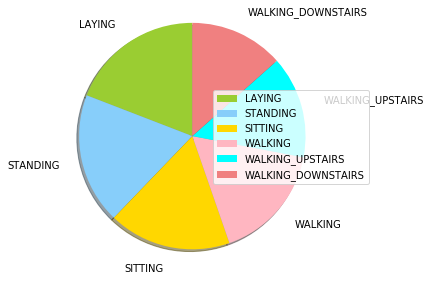

In [12]:
labels=df['labels']
sizes = df['values']
colors = ['yellowgreen', 'lightskyblue', 'gold', 'lightpink', 'cyan', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, labels = labels, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc='right')
plt.axis('equal')
plt.tight_layout()
plt.show()

### Data Processing

In [13]:
X_train = pd.DataFrame(train.drop(['Activity', 'subject'], axis=1))
Y_train_label = train.Activity.values.astype(object)
X_test = pd.DataFrame(test.drop(['Activity', 'subject'], axis=1))
Y_test_label = test.Activity.values.astype(object)

In [14]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

encoder.fit(Y_train_label)
y_train = encoder.transform(Y_train_label)

In [15]:
y_train

array([1, 1, 0, ..., 4, 5, 3])

In [16]:
encoder.fit(Y_test_label)
y_test = encoder.transform(Y_test_label)

In [17]:
y_test

array([2, 2, 5, ..., 3, 1, 4])

In [18]:
num_cols = X_train._get_numeric_data().columns
num_cols.size

561

## Model Building for Human Acitivity Recognition

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

In [20]:
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

In [21]:
y_pred = knn.predict(x_test)

In [22]:
print((accuracy_score(y_test, y_pred)*100), '%')

89.98982015609094 %


In [23]:
scores = []
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

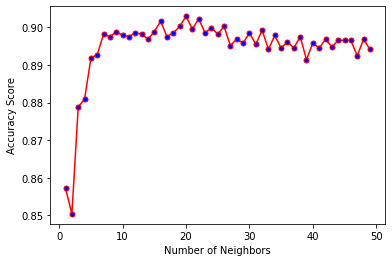

In [24]:
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
xticks = range(1,50)
plt.plot(xticks, scores, color='red', linestyle='solid', marker='o', 
        markersize=5, markerfacecolor='blue')
plt.show()

In [25]:
scores = np.array(scores)
print('Optimal number of neighbors is:', scores.argmax())
print('Accuracy Score:' +str(scores.max()*100),'%')

Optimal number of neighbors is: 19
Accuracy Score:90.29521547336275 %


### Conclusion

In [26]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred_label = list(encoder.inverse_transform(y_pred))

In [27]:
y_pred_label

['STANDING',
 'SITTING',
 'WALKING',
 'STANDING',
 'WALKING',
 'WALKING_UPSTAIRS',
 'LAYING',
 'WALKING_UPSTAIRS',
 'WALKING',
 'SITTING',
 'LAYING',
 'STANDING',
 'STANDING',
 'SITTING',
 'WALKING',
 'SITTING',
 'WALKING_DOWNSTAIRS',
 'STANDING',
 'WALKING_DOWNSTAIRS',
 'STANDING',
 'SITTING',
 'WALKING_UPSTAIRS',
 'WALKING',
 'SITTING',
 'STANDING',
 'LAYING',
 'LAYING',
 'WALKING_DOWNSTAIRS',
 'WALKING',
 'SITTING',
 'LAYING',
 'WALKING_UPSTAIRS',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'STANDING',
 'SITTING',
 'WALKING_DOWNSTAIRS',
 'LAYING',
 'STANDING',
 'WALKING_UPSTAIRS',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'WALKING_DOWNSTAIRS',
 'WALKING_DOWNSTAIRS',
 'STANDING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'LAYING',
 'WALKING_UPSTAIRS',
 'WALKING',
 'STANDING',
 'SITTING',
 'WALKING',
 'STANDING',
 'WALKING',
 'SITTING',
 'STANDING',
 'WALKING',
 'WALKING',
 'STANDING',
 'STANDING',
 'STANDING',
 'LAYING',
 'STANDING',
 'WALKING_UPSTAIRS',
 'SITTING',
 'STANDING',


In [28]:
A = confusion_matrix(Y_test_label, y_pred_label)

----------------------------------------------Confusion Matrix---------------------------------------------------


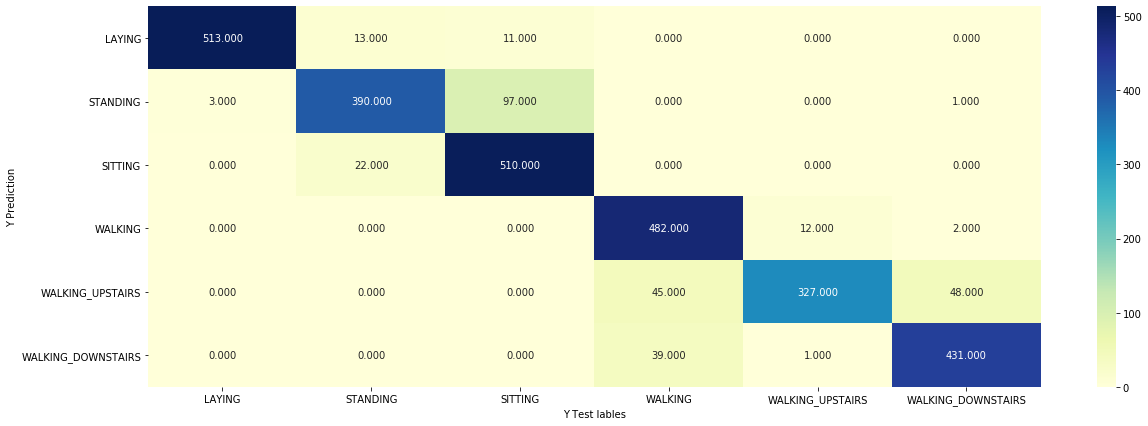

In [35]:
import seaborn as sns
print ("----------------------------------------------Confusion Matrix---------------------------------------------------")
plt.figure(figsize=(20,7))
sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Y Test lables')
plt.ylabel('Y Prediction')
plt.show()

In [36]:
print(classification_report(Y_test_label, y_pred_label))

                    precision    recall  f1-score   support

            LAYING       0.99      0.96      0.97       537
           SITTING       0.92      0.79      0.85       491
          STANDING       0.83      0.96      0.89       532
           WALKING       0.85      0.97      0.91       496
WALKING_DOWNSTAIRS       0.96      0.78      0.86       420
  WALKING_UPSTAIRS       0.89      0.92      0.90       471

          accuracy                           0.90      2947
         macro avg       0.91      0.90      0.90      2947
      weighted avg       0.91      0.90      0.90      2947

